In [23]:
from main import *

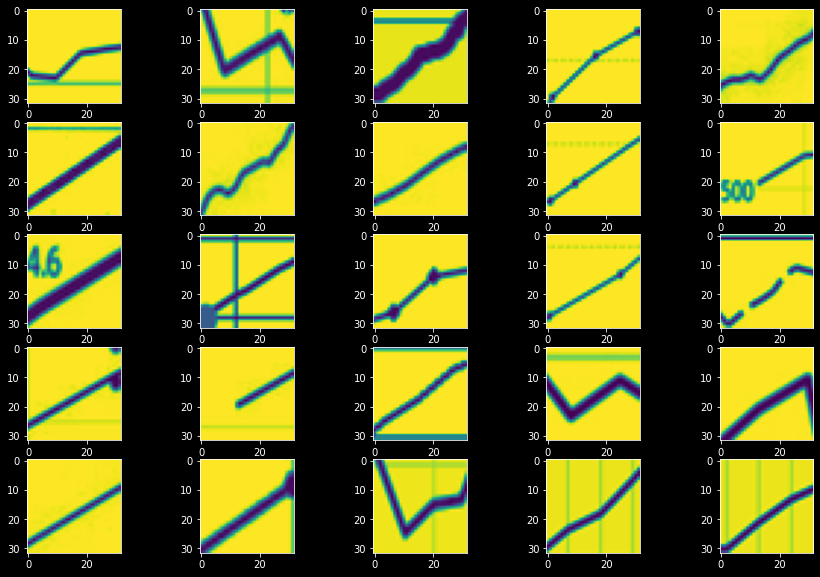

In [44]:
test_img = open_img("line-test-2.jpg", size=WINDOW_SIZE)

test_features = get_features(test_img)
[test_label] = km_model.predict([test_features])

show_cluster(km_model, test_label, 5)

572 0.652945339679718


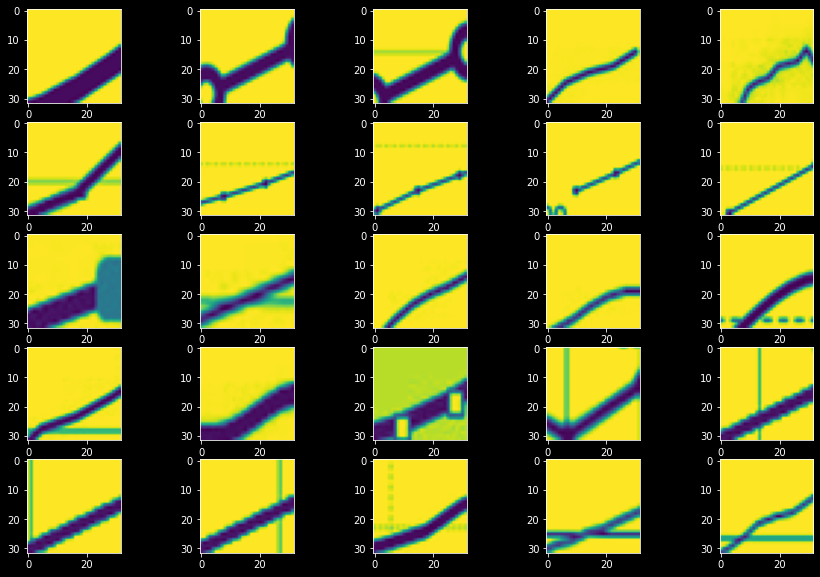

174 0.6499447226524353


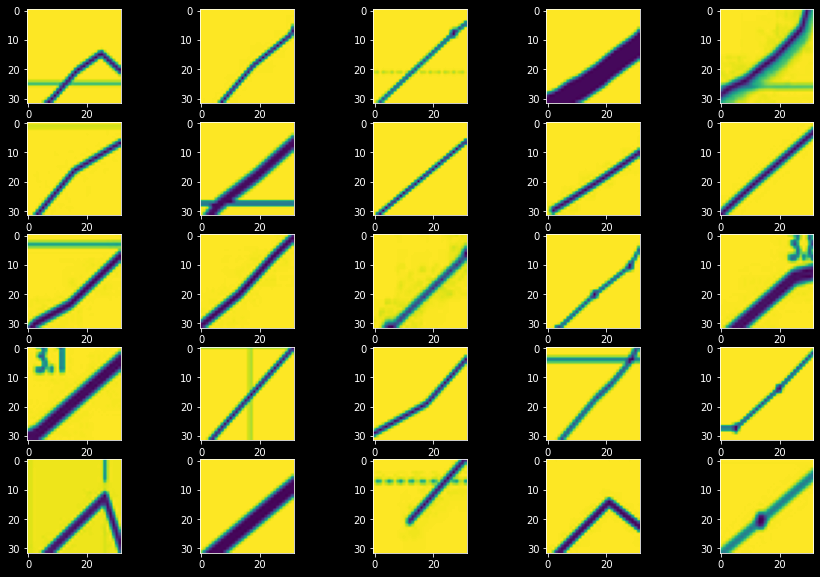

686 0.6372107863426208


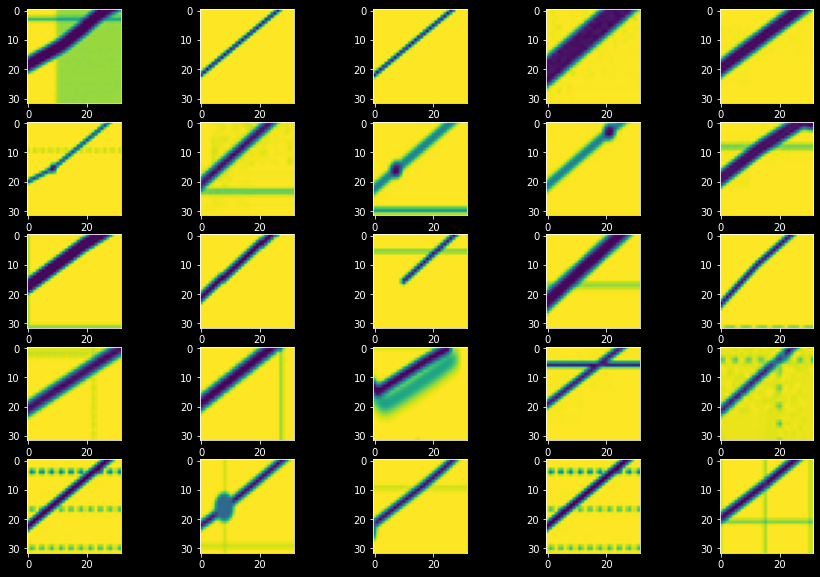

763 0.6110714673995972


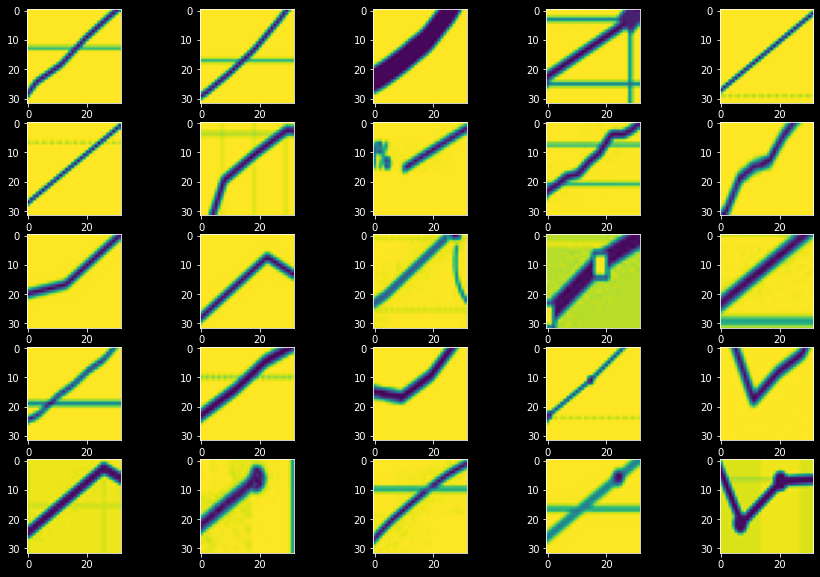

670 0.6107351779937744


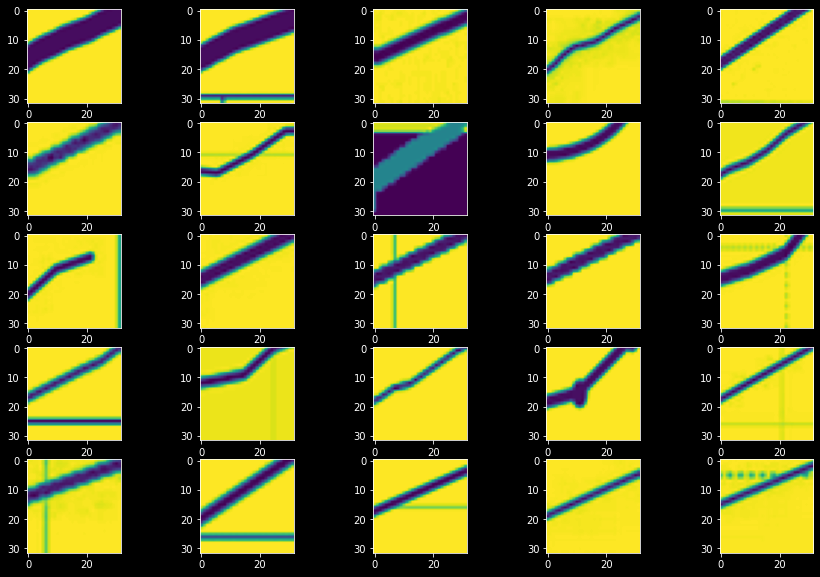

567 0.6058176755905151


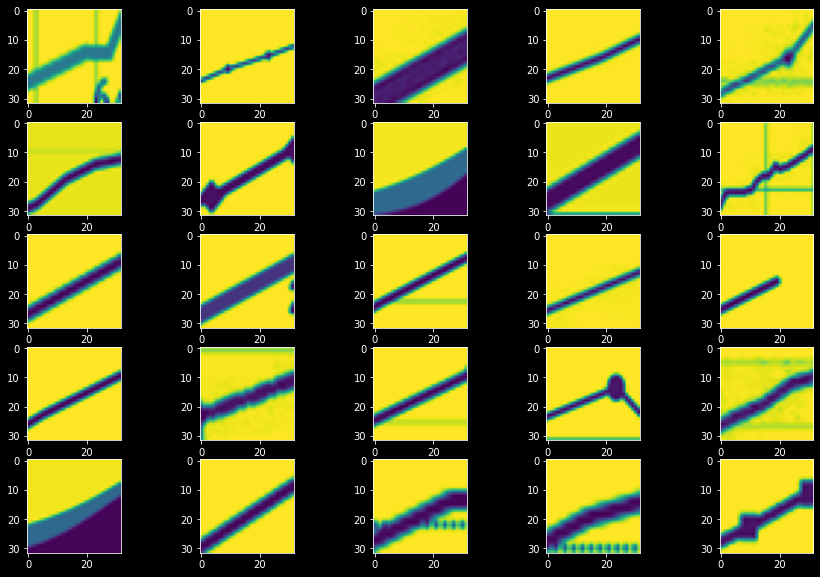

935 0.5894957184791565


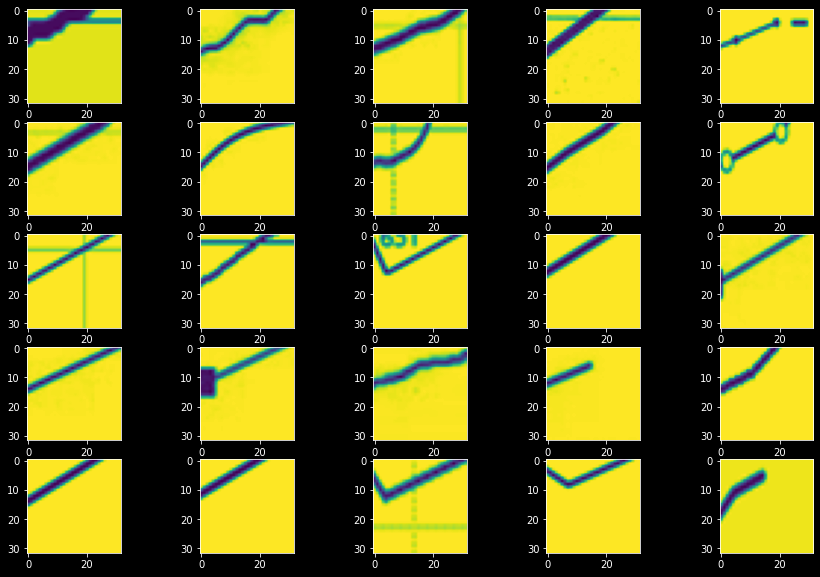

484 0.5858801603317261


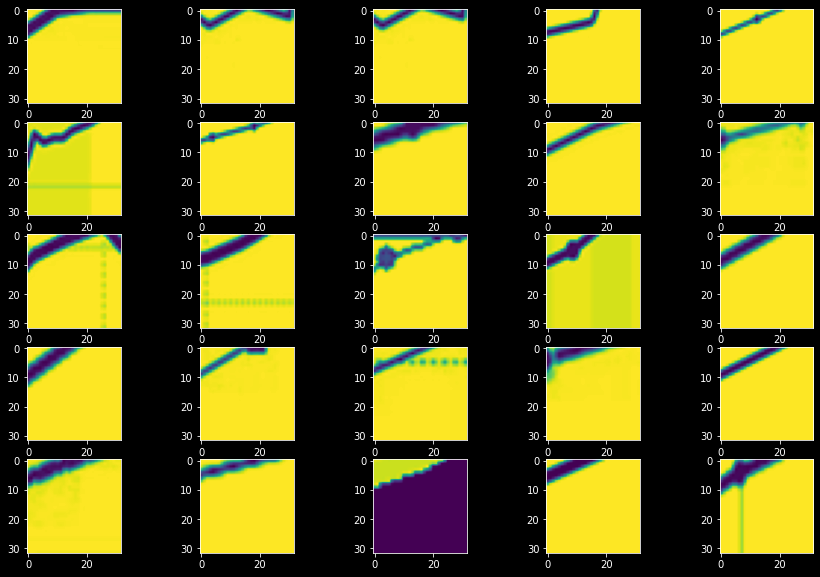

421 0.5723563432693481


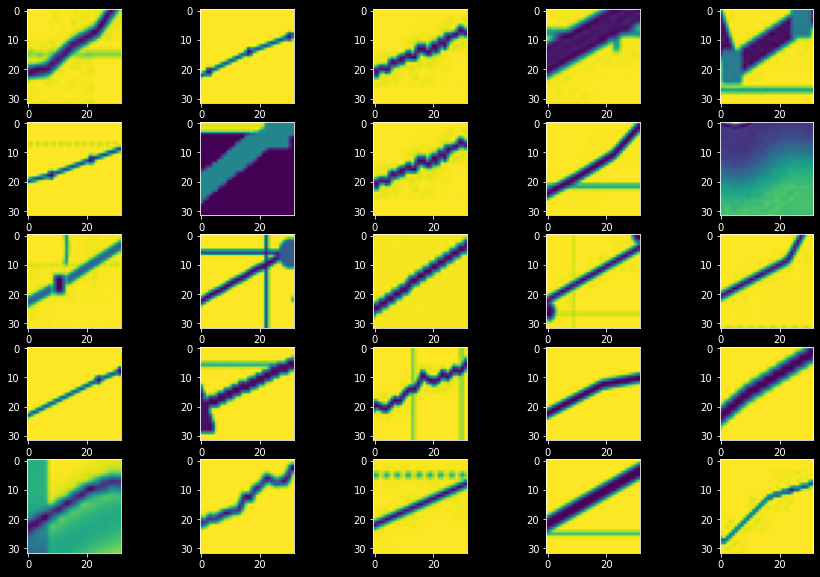

345 0.5412670373916626


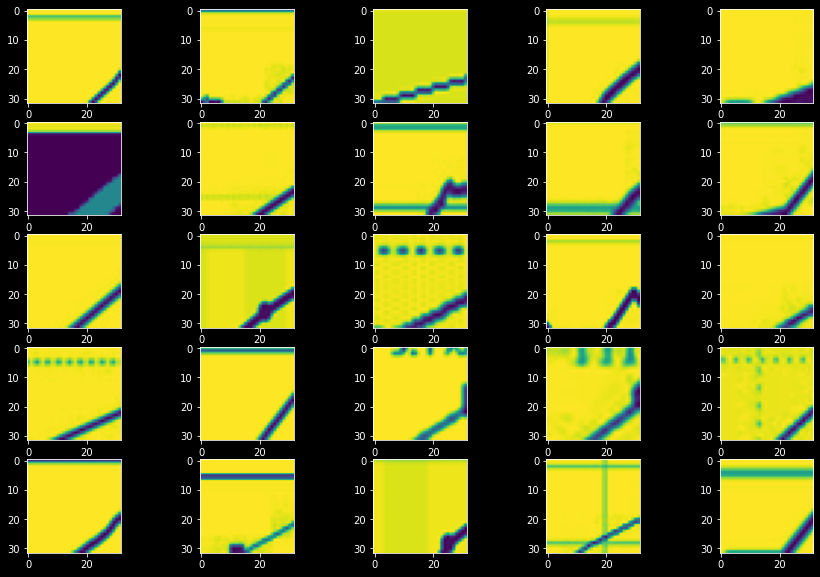

In [25]:
for center, similarity in wv_model.wv.most_similar(str(test_label), topn=10):
    print(center, similarity)
    show_cluster(km_model, int(center))

174 0.9009504662382173


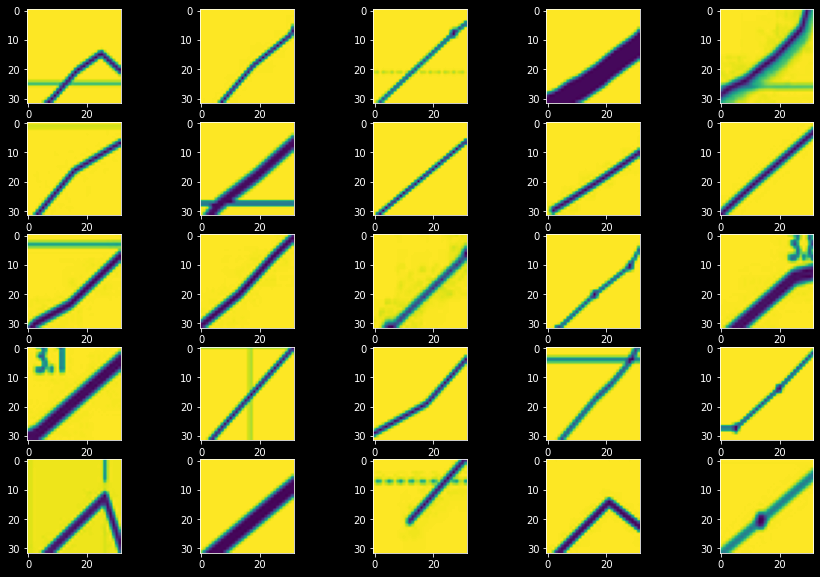

567 0.893012581746524


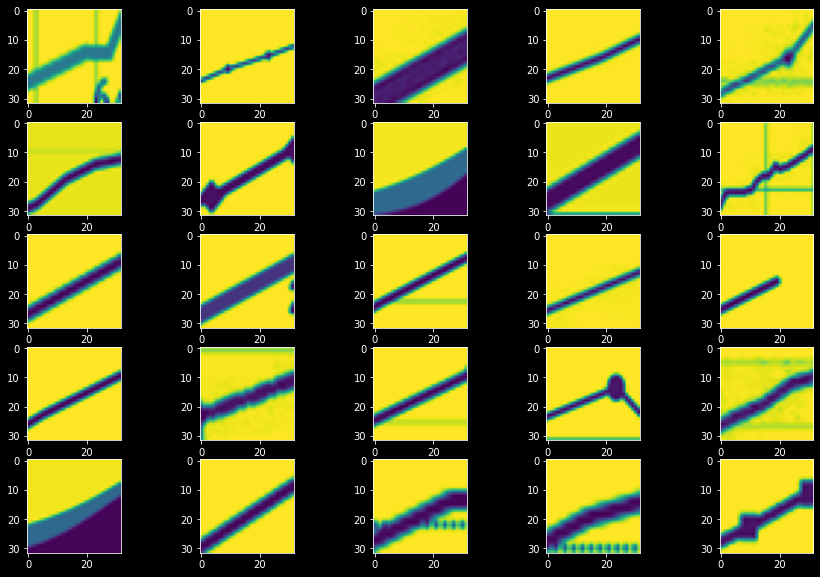

193 0.8887638115831594


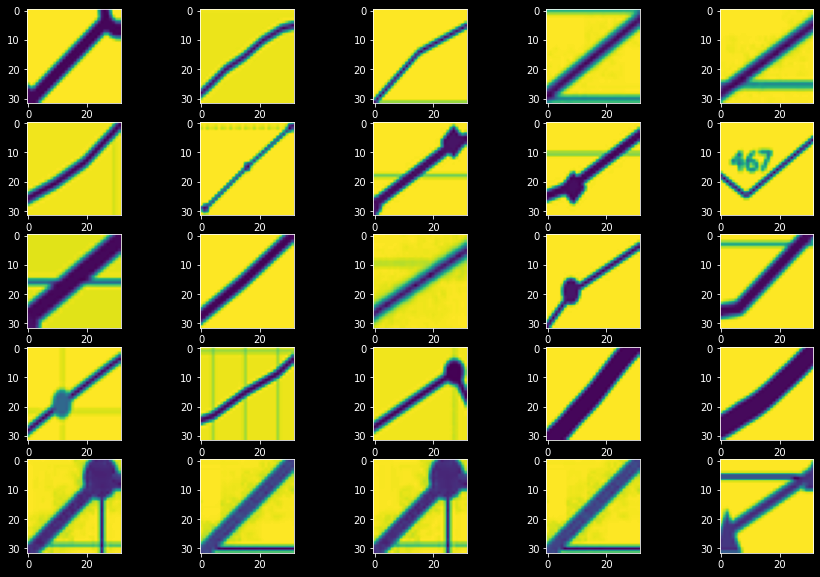

660 0.8350734227414667


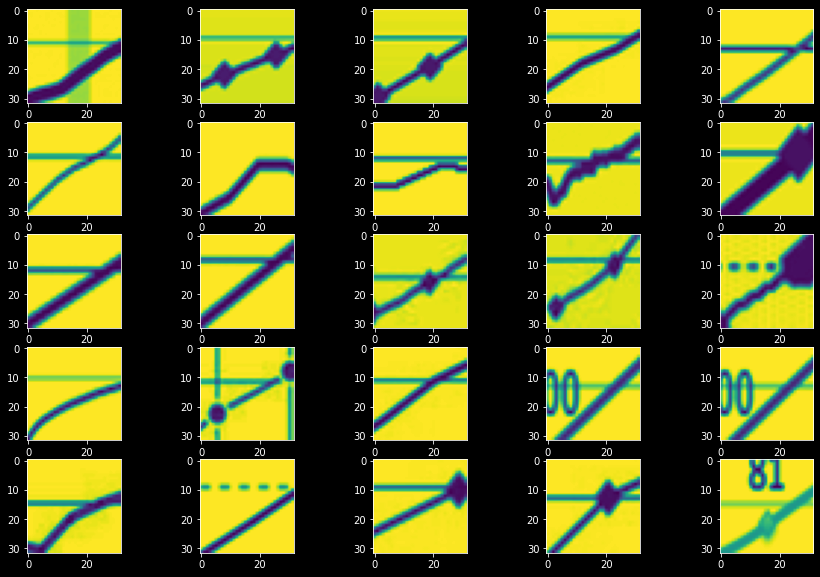

59 0.8309328620814629


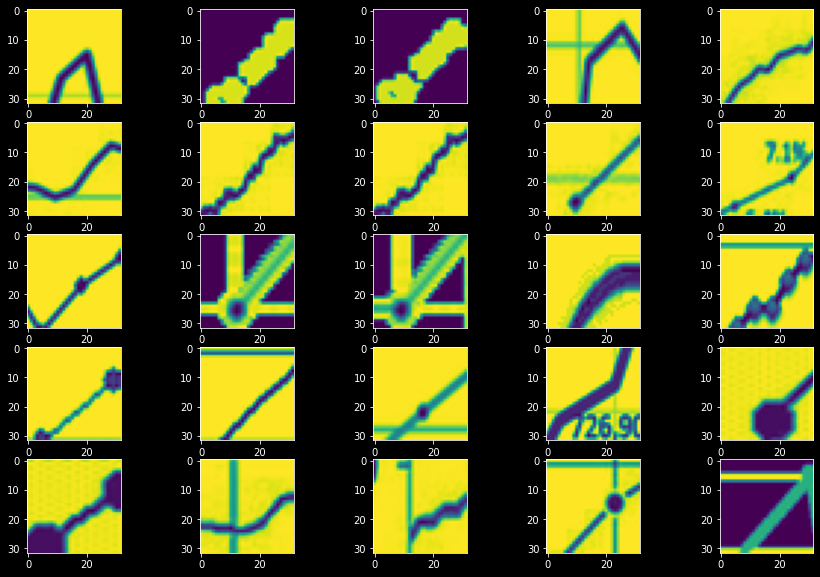

421 0.7651633521556768


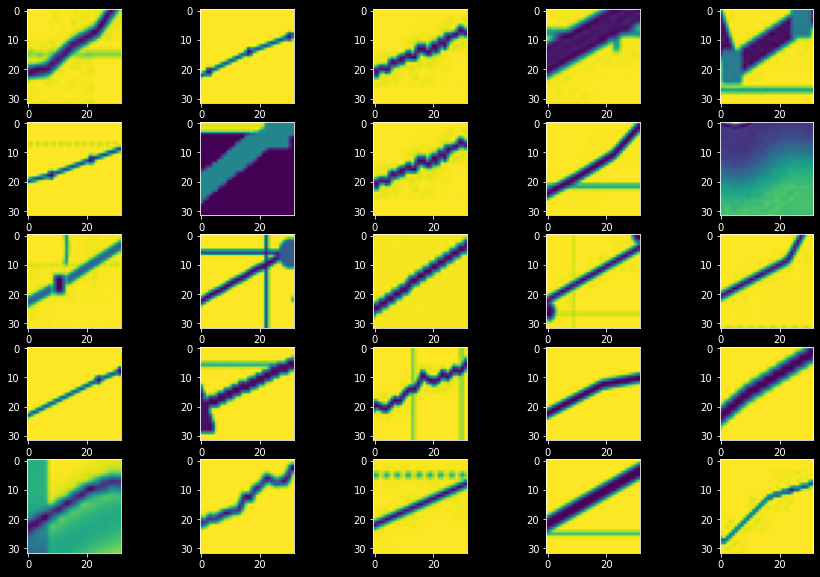

355 0.7444216902615287


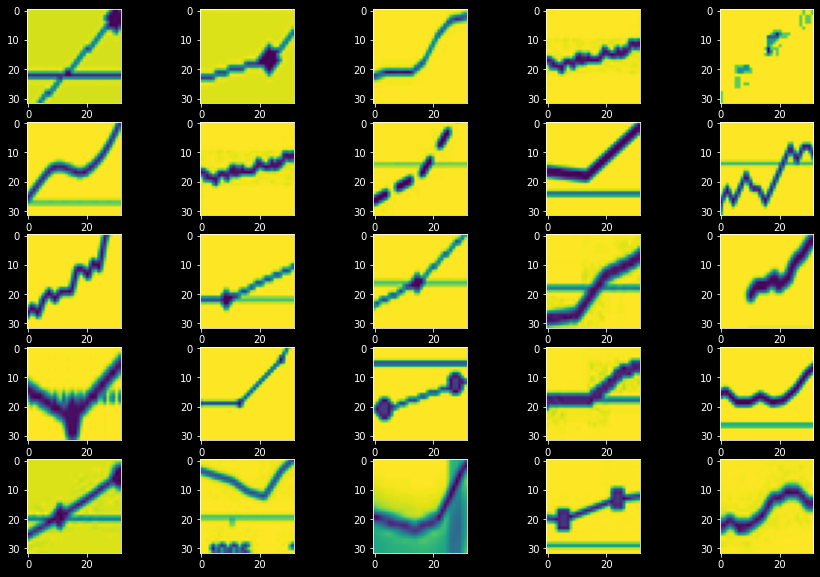

572 0.7388773415632238


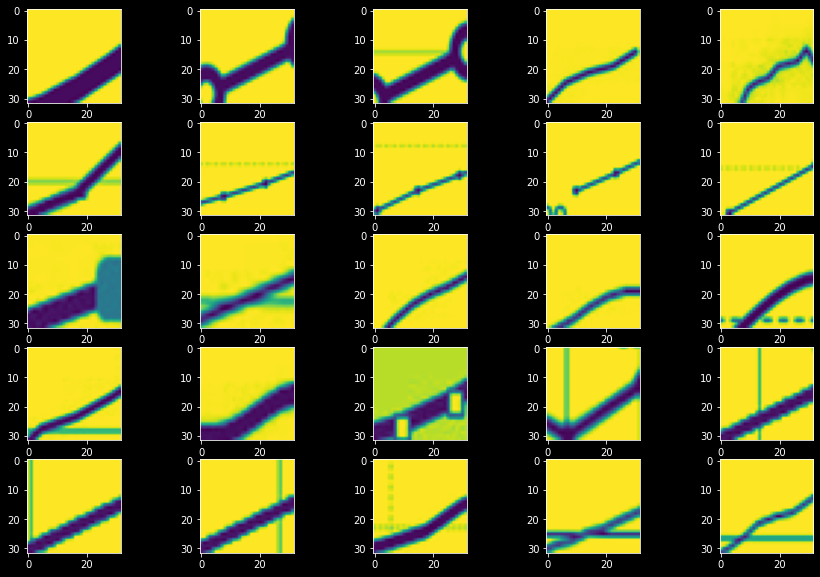

379 0.682485200561884


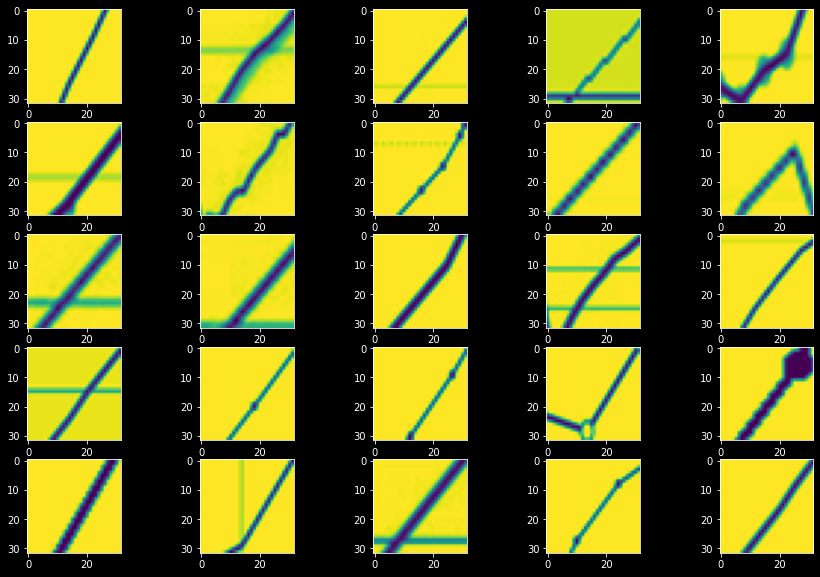

763 0.6766277597612177


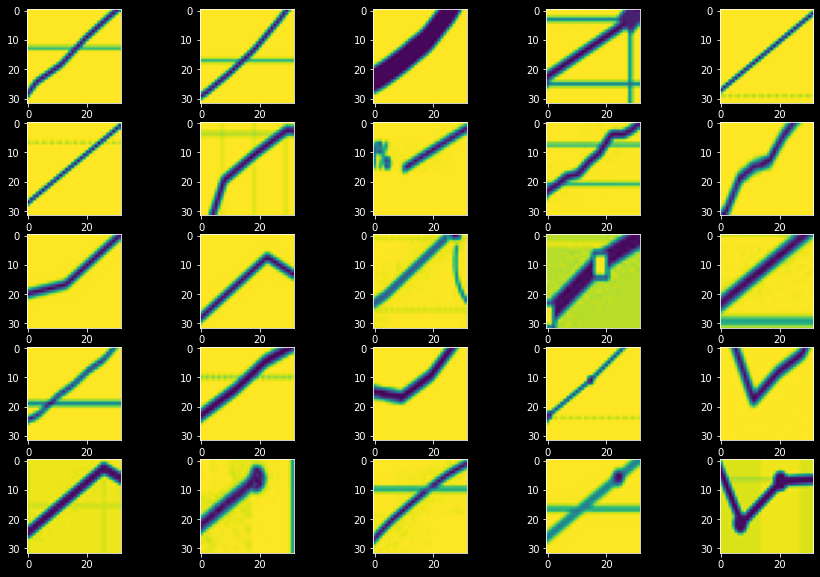

In [26]:
for center, similarity in most_similar_clusters(km_model, test_label, topn=10):
    print(center, similarity)
    show_cluster(km_model, int(center))

How similar are the closest embeddings using visual features?

In [27]:
for (cluster_idx, _) in wv_model.wv.most_similar(str(test_label), topn=10):
    print([i for (i, _) in most_similar_clusters(km_model, test_label, topn=1000)].index(int(cluster_idx)))

7
0
30
9
88
1
848
881
5
480


How similar are the closest cluster centroids in the embedding space?

In [28]:
for (cluster_idx, _) in most_similar_clusters(km_model, test_label, topn=10):
    print([i for (i, _) in wv_model.wv.most_similar(str(test_label), topn=1000)].index(str(cluster_idx)))


1
5
12
40
20
8
61
0
27
3


In [43]:
# Question: do we get additional information from the embedding
# We want:
# - visually similar entities to be close in embedding spaces
# - things to be close to each other that didn't have similar visual features

average_cluster_pos = 0
average_w2v_pos = 0
for i in range(1000):
    average_cluster_pos += np.mean([[i for (i, _) in most_similar_clusters(km_model, i, topn=1000)].index(int(cluster_idx)) for (cluster_idx, _) in wv_model.wv.most_similar(str(i), topn=10)])
    average_w2v_pos += np.mean([[i for (i, _) in wv_model.wv.most_similar(str(i), topn=1000)].index(str(cluster_idx)) for (cluster_idx, _) in most_similar_clusters(km_model, i, topn=10)])
print("Average cluster position of nearest 10 w2v vectors " + str(average_cluster_pos/1000))
print("Average w2v position of nearest 10 cluster centroids " + str(average_w2v_pos/1000))

Average cluster position of nearest 10 w2v vectors 172.15409999999986
Average w2v position of nearest 10 cluster centroids 76.65890000000012
